# Project: Walmart Sales Dataset of 45stores

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. In India, Walmart operates under the name of Flipkart Wholesale.


|Attribute| Description
:---| ---
|**Store** | Store Numbers ranging from 1 to 45|
|**Date** | The Week of Sales. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010|
|**Weekly_Sales** | The sales of the given store in the given week|
|**Holiday_Flag** | If the week has a special Holiday or not. 1-The week has a Holiday, 0-Fully working week Holiday events is given in|
|**Temperature** | Average Temperature of the week of sales|
|**Fuel_Price** | Price of the Fuel in the region of the given store|
|**CPI** | Customer Price Index|
|**Unemployment** | Unemployment of the given store region|


### Question(s) for Analysis
 
 
 #### Q1: Which year did the 45 stores generate the most revenue?
 #### Q2: Is there a significant difference in the revenue generated each year?
 #### Q3: Does holiday flag affect weekly sales?
 #### Q4: How much in total did the stores generated over the years (2010-2012)?
 #### Q5: What store generated the most revenue over the years, and in 2012?
 #### Q6: Is there any relationship between fuel_price, unemployment, temperature, cpi, and weekly sales.


<a id='wrangling'></a>
## Data Wrangling

In [1]:
#Unzipping the zipfile contents into the working directory
import zipfile as zip
with zip.ZipFile('WALMART SALES.zip', 'r') as myzip:
    myzip.extractall()

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

#loading in the data
walmart = pd.read_csv('walmart-sales-dataset-of-45stores.csv')

In [2]:
#Viewing the dataset
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
#Checking for null values and datatype
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#Changing column case to lower case
walmart.rename(columns = lambda x:x.lower(), inplace = True)

In [5]:
#Changing date object datatype to datetime
walmart['date'] = pd.to_datetime(walmart['date'], dayfirst = True)

#checking
walmart.dtypes

store                    int64
date            datetime64[ns]
weekly_sales           float64
holiday_flag             int64
temperature            float64
fuel_price             float64
cpi                    float64
unemployment           float64
dtype: object

In [6]:
#Extract day, week, month, and year as new columns from date
walmart['day'] = walmart.date.dt.day
walmart['week'] = walmart.date.dt.isocalendar().week
walmart['month'] = walmart.date.dt.month
walmart['year'] = walmart.date.dt.year

#Checking
walmart.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,9,3,2010


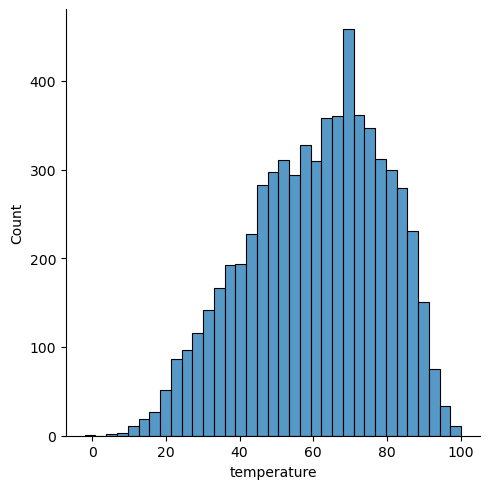

In [7]:
#Checking for outliers in temperature column
sb.displot(data = walmart,  x = 'temperature');

In [8]:
#Viewing descriptive stats of the dataset
walmart.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,week,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,25.818182,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,14.129201,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,14.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,26.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,38.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,52.0,12.000000,2012.000000


In [9]:
walmart_neg_tem = walmart[walmart['temperature'].astype(str).str.contains('-')]
walmart_neg_tem

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,week,month,year
910,7,2011-02-04,558027.77,0,-2.06,3.011,191.762589,8.818,4,5,2,2011


In [10]:
walmart.drop(walmart_neg_tem.index, inplace = True)

In [11]:
walmart.to_csv('walmart-sales-dataset-of-45stores_edited.csv', index = False)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

#loading in the data
walmart_edited = pd.read_csv('walmart-sales-dataset-of-45stores_edited.csv')

#viewing the edited dataset
walmart_edited.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,week,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,6,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,9,3,2010


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Which year did the 45 stores generated the most revenue?

year
2010    1059669
2011    1046448
2012    1033660
Name: weekly_sales, dtype: int64


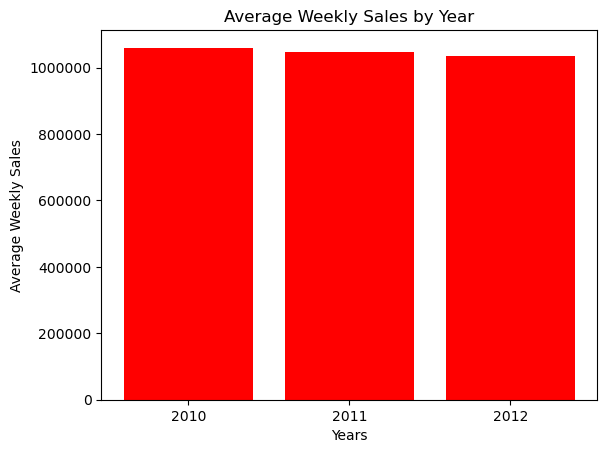

In [2]:
avg_year_sales = walmart_edited.groupby('year')['weekly_sales'].mean().astype('int64')
print(avg_year_sales)
ind = np.arange(len(avg_year_sales)) 
plt.bar(ind, avg_year_sales, color = 'r')
plt.xlabel('Years')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Year')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xticks(ind, ['2010', '2011', '2012'])
plt.show()

**Though there is not much difference in the average yearly sales by year, 2010 generated the most revenue on the average. Also, there seemed to be a decreasing trend in the average yearly sales, 2010 being the highest, followed by 2011, and 2012 being the least.**

### Question 2: Is there a significant difference in the revenue generated each year?

In [3]:
from scipy import stats

#Create groups for one-way ANOVA
weekly_sales2010 = walmart_edited['weekly_sales'][walmart_edited['year'] == 2010].values
weekly_sales2011 = walmart_edited['weekly_sales'][walmart_edited['year'] == 2011].values
weekly_sales2012 = walmart_edited['weekly_sales'][walmart_edited['year'] == 2012].values

#Run the analysis
stats.f_oneway(weekly_sales2010, weekly_sales2011, weekly_sales2012)

F_onewayResult(statistic=1.0858891068431886, pvalue=0.33766338123938183)

**The F-statistic and p-value 1.086 and 0.338 respectively indicates that there is no significant difference in the sales for each year.** 

### Question 3: Does holiday flag affect weekly sales?


NB: 1-The week has a special Holiday, 0-Fully working week Holiday events is given in

In [4]:
#Calculating average weekly sales for each holiday flag
avg_hol_sales = walmart_edited.groupby('holiday_flag')['weekly_sales'].mean().astype('int64')
print(avg_hol_sales)

holiday_flag
0    1041337
1    1122887
Name: weekly_sales, dtype: int64


**Average sales of weeks with special holidays is higher than that with fully working weeks from 2010-2012. This implies that special holidays draw out more persons for shopping which in turn improves sales. To further confirm if this difference is significant, T-test will be conducted.**

Null hypothesis (H0): Holiday flags do not affect weekly sales. 

Alternative hypothesis (H1): Holiday flags affect weekly sales.

In [5]:
#Creating data groups from each holiday flags
weekly_sales_1 = walmart_edited['weekly_sales'][walmart_edited['holiday_flag'] == 1].values
weekly_sales_0 = walmart_edited['weekly_sales'][walmart_edited['holiday_flag'] == 0].values

# Print the variance of both data groups
print(np.var(weekly_sales_1) 
      , np.var(weekly_sales_0))

393112843994.82806 312394386528.64276


Here, the variance ratio 393112843994.82806/312394386528.64233 is less than 4:1. we can consider that the given data groups have equal variance.

In [6]:
# Perform the two sample t-test with equal variances
stats.ttest_ind(a=weekly_sales_1, b=weekly_sales_0, equal_var=True)


TtestResult(statistic=2.95788445291824, pvalue=0.0031088554319298146, df=6432.0)

**The T-statistic of 2.958 and p-value of 0.003 suggests that there is a statistical significant difference in the weekly sales as a result of each holiday flag. i.e; holiday flags do affect weekly sales**

### Question 4: How much in total did the stores generated over the years (2010-2012)?

In [7]:
walmart_edited.weekly_sales.sum()

6736660959.34

**From 2010 -2012, the 45 stores generated a total amount of $6,736,660,959.34**

### Question 5: What store generated the most revenue over the years, and in 2012?

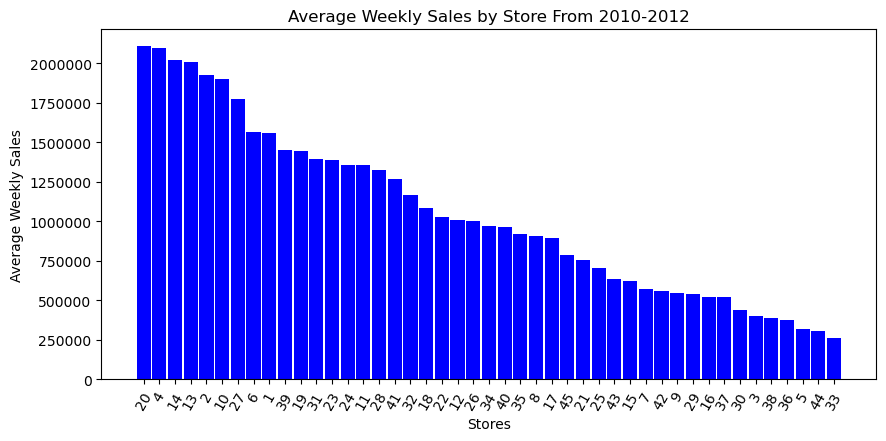

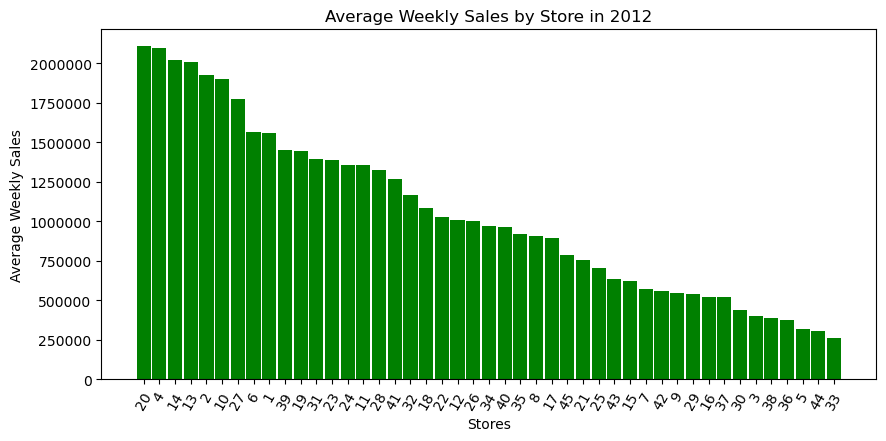

In [18]:
#selecting average weekly sales from 2010-2012
avg_store_sales = walmart_edited.groupby('store')['weekly_sales'].mean()
avg_store_sales_sorted = avg_store_sales.sort_values(ascending = False)
ind = np.arange(len(avg_store_sales_sorted)) 

#selecting average weekly sales for 2012
walmart2012 = walmart_edited.query('year == 2012')
avg2012_store_sales_sorted = walmart2012.groupby('store')['weekly_sales'].mean().sort_values(ascending = False)
ind2 = np.arange(len(avg2012_store_sales_sorted)) 

#plotting the chart
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.bar(ind, avg_store_sales_sorted, width = 0.9, color = 'b')
plt.xlabel('Stores')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store From 2010-2012')
plt.ticklabel_format(useOffset=False,style='plain', axis='y') #Changing the scientific notation
labels = ['20',  '4', '14', '13',  '2', '10', '27',  '6',  '1', '39', '19', '31', '23', '24', '11', '28', '41',
            '32', '18', '22', '12', '26', '34', '40', '35',  '8', '17', '45', '21', '25', '43', '15',  '7', '42',
             '9', '29', '16', '37', '30',  '3', '38', '36',  '5', '44', '33']
locations = ind
plt.xticks(locations,labels, rotation=60)
plt.show()

#plotting for 2012
plt.figure(figsize = (10,10))
plt.subplot(2,1,2)
plt.bar(ind, avg_store_sales_sorted, width = 0.9, color = 'g')
plt.xlabel('Stores')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store in 2012')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
labels = ['20',  '4', '14', '13',  '2', '10', '27',  '6',  '1', '39', '19', '31', '23', '24', '11', '28', '41',
            '32', '18', '22', '12', '26', '34', '40', '35',  '8', '17', '45', '21', '25', '43', '15',  '7', '42',
             '9', '29', '16', '37', '30',  '3', '38', '36',  '5', '44', '33']
locations = ind2
plt.xticks(locations,labels, rotation=60)
plt.show()

**Store '20' generated the most revenue on the average over the years (2010-2012), and in 2012.**

### Question 6: Is there any relationship between fuel_price, unemployment, temperature, cpi, and weekly sales.

In [19]:
#Display a correlation matrix for int variables
corr = walmart_edited.corr(numeric_only = 'True')
corr.style.background_gradient(cmap = 'coolwarm')

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,week,month,year
store,1.000000,-0.335557,-0.000053,-0.023334,0.059888,-0.209423,0.223645,-0.000255,-0.000282,-0.000263,0.000008
weekly_sales,-0.335557,1.000000,0.036856,-0.064330,0.009363,-0.072571,-0.106125,-0.017593,0.074030,0.075974,-0.018373
holiday_flag,-0.000053,0.036856,1.000000,-0.155377,-0.078383,-0.002140,0.010979,0.044476,0.127702,0.122956,-0.056781
temperature,-0.023334,-0.064330,-0.155377,1.000000,0.144718,0.177322,0.101481,0.026296,0.235656,0.235382,0.064350
fuel_price,0.059888,0.009363,-0.078383,0.144718,1.000000,-0.170593,-0.034634,0.027921,-0.032583,-0.042326,0.779510
cpi,-0.209423,-0.072571,-0.002140,0.177322,-0.170593,1.000000,-0.302066,0.002791,0.006160,0.005090,0.074794
unemployment,0.223645,-0.106125,0.010979,0.101481,-0.034634,-0.302066,1.000000,-0.004143,-0.015794,-0.012654,-0.241820
day,-0.000255,-0.017593,0.044476,0.026296,0.027921,0.002791,-0.004143,1.000000,0.103448,0.014911,0.006416
week,-0.000282,0.074030,0.127702,0.235656,-0.032583,0.006160,-0.015794,0.103448,1.000000,0.995984,-0.181940
month,-0.000263,0.075974,0.122956,0.235382,-0.042326,0.005090,-0.012654,0.014911,0.995984,1.000000,-0.194484


In [20]:
#Define a function to plot a scatter matrix of the variables
def scatter(data, column):
    plt.figure(figsize = [5,4])
    sb.regplot(data = data, x = column, y = 'weekly_sales', x_jitter = 0.05)
    plt.ticklabel_format(style = 'plain')

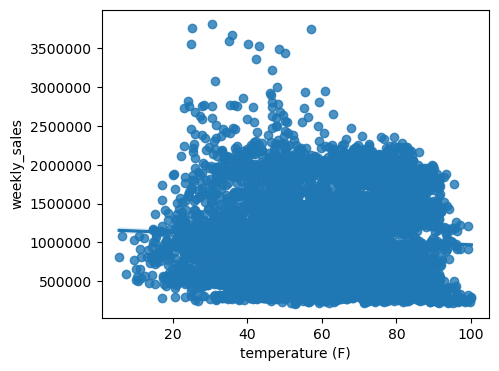

In [21]:
scatter(walmart_edited, 'temperature')
plt.xlabel('temperature (F)');

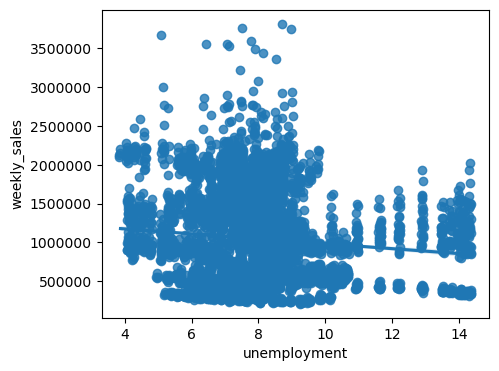

In [22]:
scatter(walmart_edited, 'unemployment')

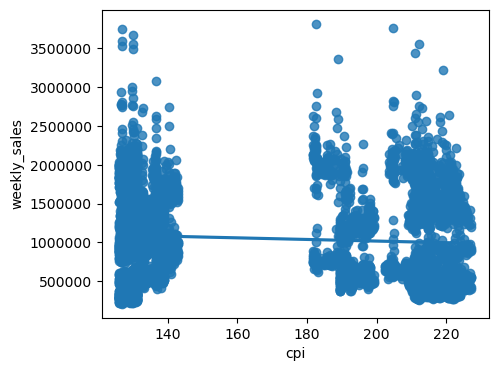

In [23]:
scatter(walmart_edited, 'cpi')

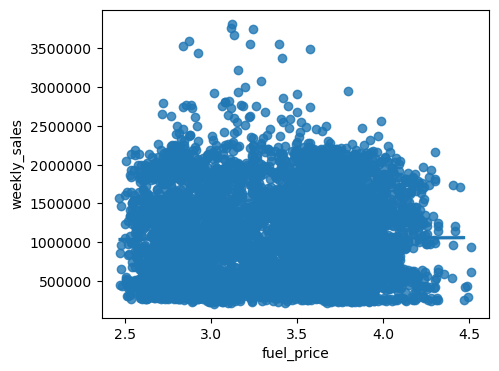

In [24]:
scatter(walmart_edited, 'fuel_price');

**From the correlation matrix table, there is a very weak positive relationship between Fuel price and Weekly sales(r = 0.009). While a very weak and negative relationship exists between Temperature (r = -0.064), CPI (r = -0.073), unemployment (-0.106), and Weekly sales. The relationships are [too weak to  build a linear regression model](https://www.w3schools.com/python/python_ml_linear_regression.asp). This can further be seen in the scatter plots**

**r = correlation coefficient**

<a id='conclusions'></a>
## Conclusion

#### From the analysis:

- 2010 generated the most weekly revenue on the average.
- There is no significant difference in the weekly sales generated for each year.
- There is a statistical significant difference in the weekly sales as a result of each holiday flag.
- From 2010 -2012, the 45 stores generated a total amount of $6,736,660,959.34.
- Store '20' generated the most revenue on the average over the years (2010-2012), and in 2012.
- There is a very weak positive relationship between Fuel price and Weekly sales(r = 0.009). While a very weak and negative relationship exists between Temperature (r = -0.064), CPI (r = -0.073), unemployment (-0.106), and Weekly sales.
